In [1]:
# Load train dataset ann-train.data (space separated values)
import numpy as np
import pandas as pd

df = pd.read_csv('ann-train.data', sep=' ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0.00060,0.0150,0.120,0.082,0.146,3,NaN,NaN
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.0300,0.143,0.133,0.108,3,NaN,NaN
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0.00190,0.0240,0.102,0.131,0.078,3,NaN,NaN
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0.00090,0.0170,0.077,0.090,0.085,3,NaN,NaN
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.0260,0.139,0.090,0.153,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.77,0,0,0,0,0,0,0,0,0,...,0,0,0.00006,0.0206,0.125,0.107,0.117,3,NaN,NaN
3768,0.41,0,0,0,0,0,0,0,0,0,...,0,0,0.00130,0.0250,0.125,0.114,0.109,3,NaN,NaN
3769,0.88,0,0,0,0,0,0,0,0,0,...,0,0,0.01300,0.0174,0.123,0.099,0.124,2,NaN,NaN
3770,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0.00078,0.0206,0.106,0.088,0.121,3,NaN,NaN


In [2]:
# Drop last two columns
df = df.drop(df.columns[-2:], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.0150,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0300,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0240,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.0170,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0260,0.139,0.090,0.153,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00006,0.0206,0.125,0.107,0.117,3
3768,0.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00130,0.0250,0.125,0.114,0.109,3
3769,0.88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.01300,0.0174,0.123,0.099,0.124,2
3770,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00078,0.0206,0.106,0.088,0.121,3


In [3]:
# How much of each class (column 21)
print("Class 1: ", len(df[df[21] == 1]))
print("Class 2: ", len(df[df[21] == 2]))
print("Class 3: ", len(df[df[21] == 3]))

Class 1:  93
Class 2:  191
Class 3:  3488


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score,
                             ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [5]:
# Create binary target (3 vs non-3)
df['binary_target'] = df[21].apply(lambda x: 1 if x == 3 else 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,binary_target
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0.00060,0.015,0.120,0.082,0.146,3,1
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00025,0.030,0.143,0.133,0.108,3,1
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00190,0.024,0.102,0.131,0.078,3,1
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0.00090,0.017,0.077,0.090,0.085,3,1
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00025,0.026,0.139,0.090,0.153,3,1


In [24]:
# Split features and target
X = df.drop(['binary_target', 21], axis=1)
y = df['binary_target']

In [25]:
# Split into train/test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3017, 21)
(755, 21)
(3017,)
(755,)


In [26]:
# Identify feature types
binary_cols = list(range(1,16))
continuous_cols = list(range(15, 21))+[0]

In [27]:
# Create preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),  # Scale continuous features
        ('bin', 'passthrough', binary_cols)          # Leave binary features unchanged
    ])

# Create pipeline with SMOTE and SVM
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),               # Oversample minority class
    ('classifier', SVC(
        class_weight='balanced',                     # Adjust class weights
        probability=True,                           # Enable probability estimates
        random_state=42
    ))
])

In [28]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [15, 16, 17, 18, 19, 20, 0]),
                                                 ('bin', 'passthrough',
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [29]:
# Evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]       # Get probabilities for class 1

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Confusion Matrix:
[[ 54   3]
 [ 11 687]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        57
           1       1.00      0.98      0.99       698

    accuracy                           0.98       755
   macro avg       0.91      0.97      0.94       755
weighted avg       0.98      0.98      0.98       755

ROC AUC Score: 0.9947


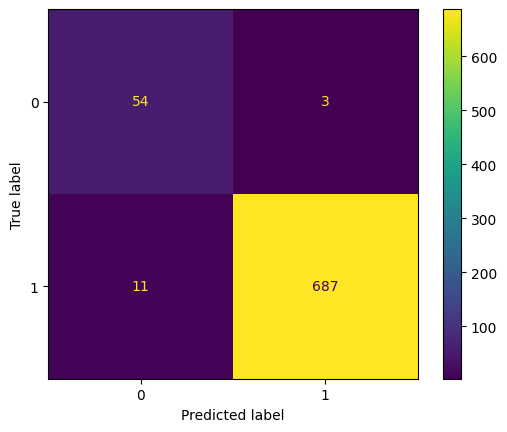

In [30]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)

In [31]:
# Load test data
df_test = pd.read_csv('ann-test.data', sep=' ', header=None)
df_test = df_test.drop(df_test.columns[-2:], axis=1)
df_test['binary_target'] = df_test[21].apply(lambda x: 1 if x == 3 else 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,binary_target
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0.00060,0.015,0.120,0.082,0.146,3,1
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00025,0.030,0.143,0.133,0.108,3,1
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00190,0.024,0.102,0.131,0.078,3,1
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0.00090,0.017,0.077,0.090,0.085,3,1
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00025,0.026,0.139,0.090,0.153,3,1


In [32]:
X_true_test = df_test.drop(['binary_target', 21], axis=1)
y_true_test = df_test['binary_target']

In [33]:
# Evaluate
y_pred = pipeline.predict(X_true_test)
y_proba = pipeline.predict_proba(X_true_test)[:, 1]       # Get probabilities for class 1

print("Confusion Matrix:")
print(confusion_matrix(y_true_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_true_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_true_test, y_proba):.4f}")

Confusion Matrix:
[[ 233   17]
 [  78 3100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       250
           1       0.99      0.98      0.98      3178

    accuracy                           0.97      3428
   macro avg       0.87      0.95      0.91      3428
weighted avg       0.98      0.97      0.97      3428

ROC AUC Score: 0.9901


In [34]:
print("Class 3 percentage: ", len(df_test[df_test[21] == 3])/len(df_test))

Class 3 percentage:  0.927071178529755


## Multiclass

In [ ]:
# Identify feature types
binary_cols = list(range(1,16))
continuous_cols = list(range(15, 21))+[0]

# Create preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),  # Scale continuous features
        ('bin', 'passthrough', binary_cols)          # Leave binary features unchanged
    ])

# Create pipeline with SMOTE and SVM
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),               # Oversample minority class
    ('classifier', SVC(
        class_weight='balanced',                     # Adjust class weights
        probability=True,                           # Enable probability estimates
        random_state=42
    ))
])

models = {}

for target_class in sorted(df[21].unique()):
	
	# Create binary target (3 vs non-3)
	df['binary_target'] = df[21].apply(lambda x: 1 if x == target_class else 0)
	df.head()

	# Split features and target
	X = df.drop(['binary_target', 21], axis=1)
	y = df['binary_target']

	# Split into train/test with stratification
	X_train, X_test, y_train, y_test = train_test_split(
		X, y,
		test_size=0.2,
		stratify=y,
		random_state=42
	)

	# Train the model
	pipeline.fit(X_train, y_train)

	models[target_class] = pipeline

	# Evaluate
	y_pred = pipeline.predict(X_test)
	y_proba = pipeline.predict_proba(X_test)[:, 1]       # Get probabilities for class 1

	print(f"\nCLASS {target_class}\n")
	print("Confusion Matrix:")
	print(confusion_matrix(y_test, y_pred))
	print("\nClassification Report:")
	print(classification_report(y_test, y_pred))
	print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


CLASS 1

Confusion Matrix:
[[732   4]
 [  1  18]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       736
           1       0.82      0.95      0.88        19

    accuracy                           0.99       755
   macro avg       0.91      0.97      0.94       755
weighted avg       0.99      0.99      0.99       755

ROC AUC Score: 0.9988

CLASS 2

Confusion Matrix:
[[696  21]
 [  7  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       717
           1       0.60      0.82      0.69        38

    accuracy                           0.96       755
   macro avg       0.79      0.89      0.83       755
weighted avg       0.97      0.96      0.97       755

ROC AUC Score: 0.9732

CLASS 3

Confusion Matrix:
[[ 54   3]
 [ 11 687]]

Classification Report:
              precision    recall  f1-score   support

           0       0.8

In [13]:
# Load test data
df_test = pd.read_csv('ann-test.data', sep=' ', header=None)
df_test = df_test.drop(df_test.columns[-2:], axis=1)

preds = []
for target_class in sorted(df_test[21].unique()):
	
	df_test['binary_target'] = df_test[21].apply(lambda x: 1 if x == target_class else 0)
	# Split features and target
	X = df_test.drop(['binary_target', 21], axis=1)
	y = df_test['binary_target']

	y_pred = models[target_class].predict(X)
	#y_proba = models[target_class].predict_proba(X_test)[:, 1] 

	print(f"\nCLASS {target_class}\n")
	print("Confusion Matrix:")
	print(confusion_matrix(y, y_pred))
	print("\nClassification Report:")
	print(classification_report(y, y_pred))
	#print(f"ROC AUC Score: {roc_auc_score(y, y_proba):.4f}")

	preds.append(y_pred)


CLASS 1

Confusion Matrix:
[[ 243 3112]
 [  68    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.07      0.13      3355
           1       0.00      0.07      0.00        73

    accuracy                           0.07      3428
   macro avg       0.39      0.07      0.07      3428
weighted avg       0.76      0.07      0.13      3428


CLASS 2

Confusion Matrix:
[[ 146 3105]
 [ 165   12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.04      0.08      3251
           1       0.00      0.07      0.01       177

    accuracy                           0.05      3428
   macro avg       0.24      0.06      0.04      3428
weighted avg       0.45      0.05      0.08      3428


CLASS 3

Confusion Matrix:
[[ 233   17]
 [  78 3100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       250


# Multiclass using sklearn

In [37]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),               # Oversample minority class
    ('classifier', SVC(
        decision_function_shape='ovo',
        class_weight='balanced',                     # Adjust class weights
        probability=True,                           # Enable probability estimates
        random_state=42
    ))
])

y = df[21]
y_true_test = df_test[21]

pipeline.fit(X, y)

# Evaluate
y_pred = pipeline.predict(X_true_test)
y_proba = pipeline.predict_proba(X_true_test)

print("Confusion Matrix:")
print(confusion_matrix(y_true_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_true_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_true_test, y_proba, multi_class='ovo'):.4f}")

Confusion Matrix:
[[  70    2    1]
 [   0  172    5]
 [  44   81 3053]]

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.96      0.75        73
           2       0.67      0.97      0.80       177
           3       1.00      0.96      0.98      3178

    accuracy                           0.96      3428
   macro avg       0.76      0.96      0.84      3428
weighted avg       0.97      0.96      0.96      3428

ROC AUC Score: 0.9938


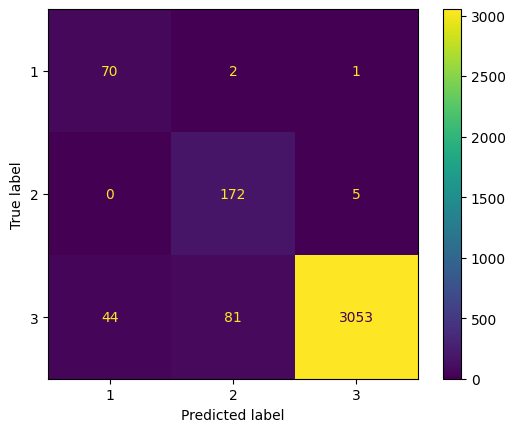

In [38]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_true_test, y_true_test)